In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c90b74d62daa49ba8b2ce9916a9d5144 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YwfYuy02TXQ7JIGVrKb3qJfytBJB9LhOeSwhXRvrIsny',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_c90b74d62daa49ba8b2ce9916a9d5144.get_object(Bucket='windturbine-donotdelete-pr-bxj0ldnrvptfi6',Key='T1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
df.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [4]:
#Convert the Format of date and time 
df['Date/Time'] = pd.to_datetime(df['Date/Time'],format='%d %m %Y %H:%M')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
Date/Time                        50530 non-null datetime64[ns]
LV ActivePower (kW)              50530 non-null float64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (°)               50530 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [5]:
#Make another Coloumns for Month , Day , Hour , Year for accuurate Prediction.
df['Month']=df['Date/Time'].dt.month
df['Day']=df['Date/Time'].dt.day 
df['Hour']=df['Date/Time'].dt.hour
df['Year']=df['Date/Time'].dt.year

## Data Visualization

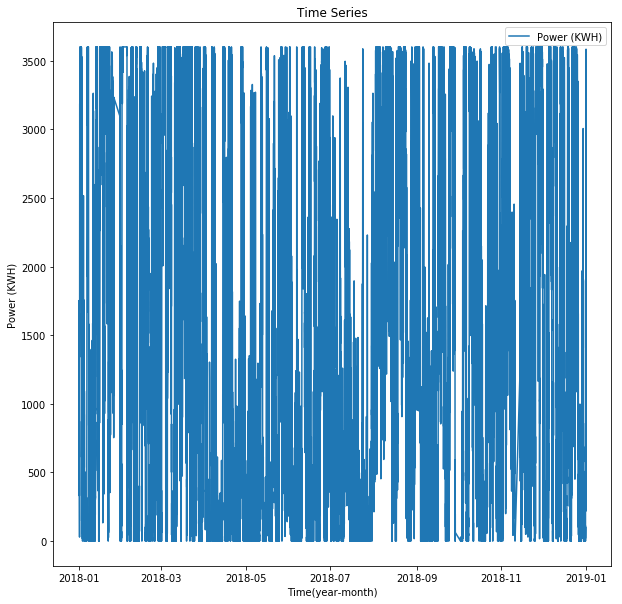

In [7]:
#Plotting Of Power Vs Time
df.index = df['Date/Time']                        # indexing the Datetime to get the time period on the x-axis.
ts = df['Theoretical_Power_Curve (KWh)']
plt.figure(figsize=(10,10))
plt.plot(ts, label='Power (KWH)')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Power (KWH)")
plt.legend(loc='best')
plt.show()

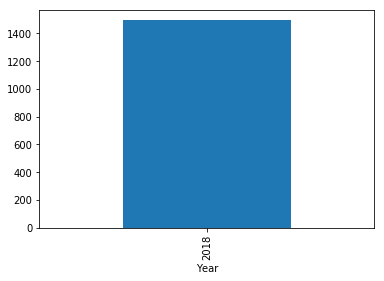

In [8]:
#Plotting Of Year/Month/Day
yr = df.groupby('Year')['Theoretical_Power_Curve (KWh)'].mean().plot.bar()
plt.show()

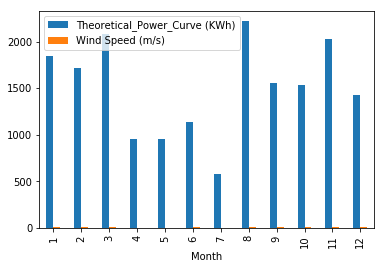

In [9]:
#Plotting Month , Theoretical Power Curve and Wind Speed
m = df.groupby('Month')['Theoretical_Power_Curve (KWh)','Wind Speed (m/s)'].mean().plot.bar()
plt.show()

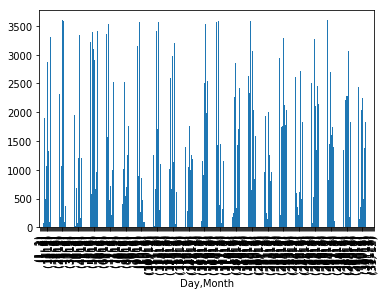

In [10]:
#Plotting Day , month and Theoretical power
df.groupby(['Day','Month'])['Theoretical_Power_Curve (KWh)'].mean().plot.bar()
plt.show()

## Label and Feature Extraction

In [11]:
#Drop columns
x = df.drop(['Theoretical_Power_Curve (KWh)','Date/Time'],axis = 1)
x

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°),Month,Day,Hour,Year
Date/Time,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,259.994904,1,1,0,2018
2018-01-01 00:10:00,453.769196,5.672167,268.641113,1,1,0,2018
2018-01-01 00:20:00,306.376587,5.216037,272.564789,1,1,0,2018
2018-01-01 00:30:00,419.645905,5.659674,271.258087,1,1,0,2018
2018-01-01 00:40:00,380.650696,5.577941,265.674286,1,1,0,2018
2018-01-01 00:50:00,402.391998,5.604052,264.578613,1,1,0,2018
2018-01-01 01:00:00,447.605713,5.793008,266.163605,1,1,1,2018
2018-01-01 01:10:00,387.242188,5.306050,257.949493,1,1,1,2018
2018-01-01 01:20:00,463.651215,5.584629,253.480698,1,1,1,2018


In [12]:
y = df['Theoretical_Power_Curve (KWh)']
y

Date/Time
2018-01-01 00:00:00     416.328908
2018-01-01 00:10:00     519.917511
2018-01-01 00:20:00     390.900016
2018-01-01 00:30:00     516.127569
2018-01-01 00:40:00     491.702972
2018-01-01 00:50:00     499.436385
2018-01-01 01:00:00     557.372363
2018-01-01 01:10:00     414.898179
2018-01-01 01:20:00     493.677652
2018-01-01 01:30:00     475.706783
2018-01-01 01:40:00     535.841397
2018-01-01 01:50:00     603.014077
2018-01-01 02:00:00     824.662514
2018-01-01 02:10:00     693.472641
2018-01-01 02:20:00     808.098138
2018-01-01 02:30:00     859.459021
2018-01-01 02:40:00     759.434537
2018-01-01 02:50:00     785.281010
2018-01-01 03:00:00     773.172863
2018-01-01 03:10:00     781.771216
2018-01-01 03:20:00     700.764700
2018-01-01 03:30:00     970.736627
2018-01-01 03:40:00    1315.048928
2018-01-01 03:50:00    1151.265744
2018-01-01 04:00:00    1497.583724
2018-01-01 04:10:00    1752.199662
2018-01-01 04:20:00    1668.470707
2018-01-01 04:30:00    1461.815791
2018-01-01

## Build Model

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=6)),('linear', LinearRegression(fit_intercept=False))])

In [16]:
model = model.fit(X_train,y_train)

## Get Prediction

In [17]:
pred_y = model.predict(X_test)

In [18]:
pred_y

array([3467.73307415, 2982.68008019,  776.11451813, ...,   20.47389759,
       1075.09855427,   17.81662961])

In [19]:
from sklearn.metrics import mean_squared_error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred_y))

y_test.shape

Mean squared error: 494.71


(10106,)

In [20]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_y)

12.538318174969866

In [21]:
model.score(X_test,y_test)

0.9997334768569658

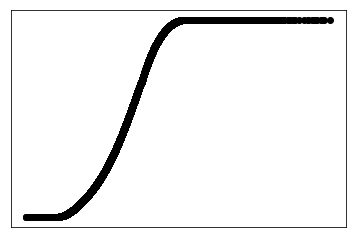

In [22]:
plt.scatter(X_test.iloc[:,1],y_test, color='black')
plt.xticks(())
plt.yticks(())

plt.show()

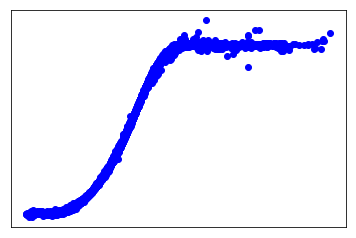

In [23]:
plt.scatter(X_test.iloc[:,1],pred_y,color='blue')
plt.xticks(())
plt.yticks(())

plt.show()

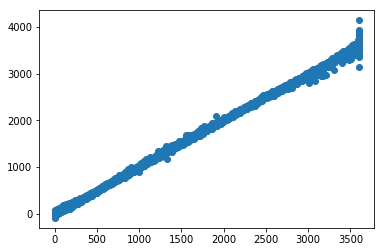

In [24]:
plt.scatter(y_test,pred_y)
plt.show()

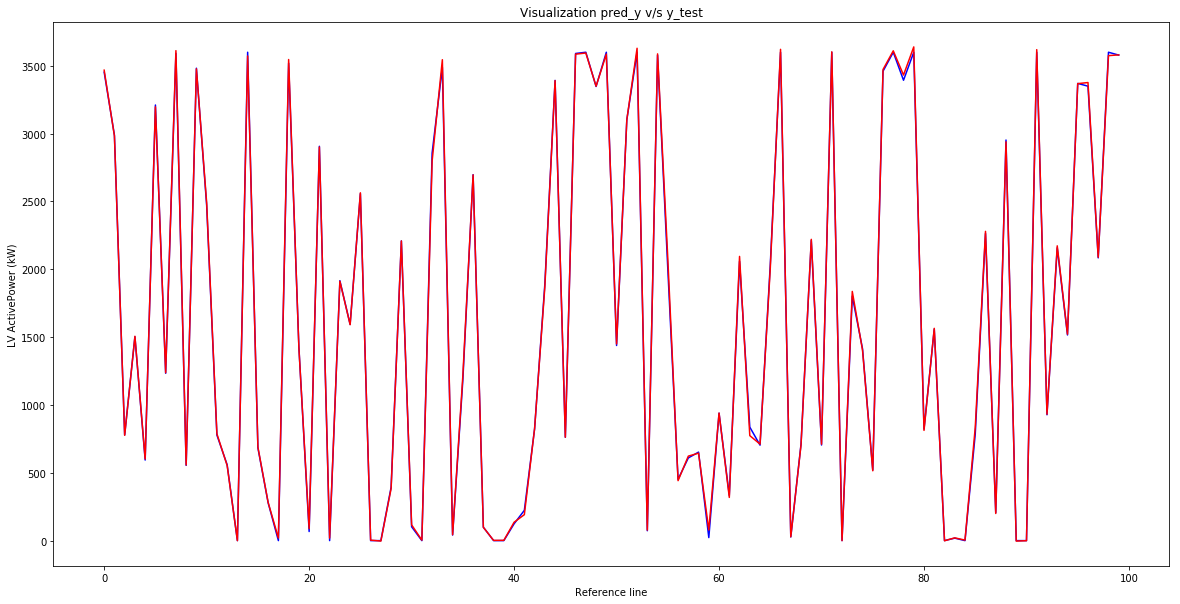

In [25]:
b = np.arange(100)
plt.figure(figsize=(20,10))
plt.plot(b, y_test[:100], color='blue', label='Actual Value') 
plt.plot(b, pred_y[:100], color='red', label='Predicted Value')
plt.title('Visualization pred_y v/s y_test')
plt.xlabel('Reference line')
plt.ylabel('LV ActivePower (kW)')
plt.show()

## Deploy Model

In [26]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [27]:
wml_credentials = {
  "apikey": "kDP_k4wL37ReoyyQR0gQmsH3gqoAwQel0hRhXuZV-Fjc",
  "iam_apikey_description": "Auto-generated for key c88fab5b-7f9b-4c1a-b39a-12cad46a68fb",
  "iam_apikey_name": "WindEnergy",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/a248d226cbac45618e7a934fe71c2e08::serviceid:ServiceId-9edae2f7-8805-4b1b-b89a-199f8d61e770",
  "instance_id": "48bbedc7-82d9-42e5-b264-bb3233048f5d",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [28]:
#Create a client
client = WatsonMachineLearningAPIClient(wml_credentials)

In [29]:
metadata = {
    client.repository.ModelMetaNames.AUTHOR_NAME : "Krishna",
    client.repository.ModelMetaNames.NAME : "WindEnergyPrediction" 
}

In [30]:
#Store the model
stored_data = client.repository.store_model(model,meta_props = metadata)

In [31]:
guid = client.repository.get_model_uid(stored_data)

In [32]:
deploy = client.deployments.create(guid)



#######################################################################################

Synchronous deployment creation for uid: '9969eab4-09b6-4915-9534-b475e44985ec' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9ed3747a-b247-4f34-a2a1-c90965d36314'
------------------------------------------------------------------------------------------------




In [33]:
scoring_endpoint = client.deployments.get_scoring_url(deploy)

In [34]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/48bbedc7-82d9-42e5-b264-bb3233048f5d/deployments/9ed3747a-b247-4f34-a2a1-c90965d36314/online'